# Cohort Analysis

- 특정기간에 같은 경험을 공유한 사람들의 집합

## 광고를 잘하고 있는가? 
- 광고 콘솔의 ctr, roas와 같은 필드 참고
- 신규모객의 관점

## 우리 비즈니스는 지속적으로 성장하고 있는가?
- 기존 고객 유지의 관점
- <u>코호트 분석
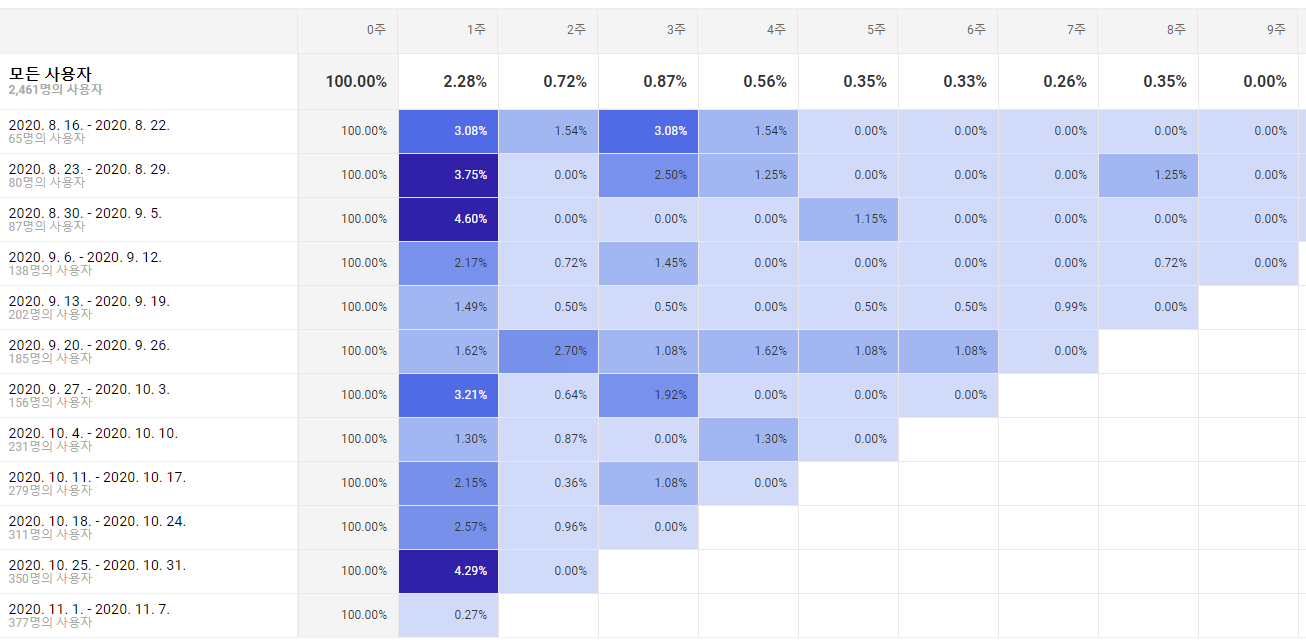

https://ichi.pro/ko/post/178995941630186

http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/

import pandas as pd
from pandas import Series
from pandas import DataFrame


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [1]:
import pandas as pd
from pandas import Series
from pandas import DataFrame


import numpy as np
import matplotlib.pyplot as plt

In [2]:
# matplotlib 한글 폰트 출력코드

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

# 파이썬을 활용한 코호트 실습

### 구매데이터 불러오기

In [3]:
df = pd.read_excel('C:/Users/jungh/lecture/러닝스푼즈/relay-foods.xlsx',sheet_name='Purchase Data - Full Study')

In [4]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [5]:
df['UserId'].nunique()

757

# 1. Create a period column based on the OrderDate
- 주문일자를 토대로 주문일자별 년-월 데이터를 생성한다

In [6]:
df['OrderDate'].dtype

dtype('<M8[ns]')

#### 시리즈의 시간데이터타입 함수가 필요한 이유

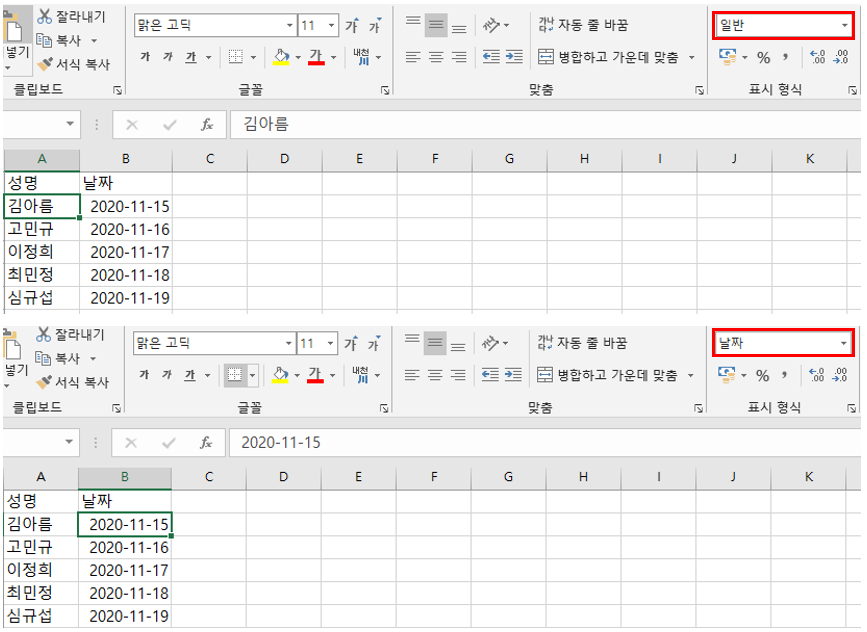

In [7]:
df_dt=pd.read_excel('C:/Users/jungh/lecture/러닝스푼즈/예제/dt_data.xlsx')

In [8]:
df_dt['성명'].dtype

dtype('O')

In [9]:
#엑셀의 셀타입이 날짜일 경우 판다스에서는 시간 데이터타입으로 인식
df_dt['날짜'].dtype

dtype('<M8[ns]')

#### 시리즈의 시간데이터타입 함수

In [10]:
df['OrderDate'].dt.date

0       2009-01-11
1       2009-01-20
2       2009-02-03
3       2009-02-06
4       2009-02-06
5       2009-02-17
6       2009-02-23
7       2009-03-01
8       2009-03-09
9       2009-03-17
10      2009-03-17
11      2009-03-24
12      2009-03-31
13      2009-04-14
14      2009-04-16
15      2009-04-23
16      2009-04-28
17      2009-04-28
18      2009-05-01
19      2009-05-04
20      2009-05-12
21      2009-05-14
22      2009-05-19
23      2009-05-26
24      2009-06-01
25      2009-06-05
26      2009-06-12
27      2009-06-16
28      2009-06-23
29      2009-07-02
           ...    
2861    2010-02-26
2862    2010-03-08
2863    2010-02-26
2864    2010-02-26
2865    2010-02-27
2866    2010-02-27
2867    2010-02-28
2868    2010-03-08
2869    2010-02-28
2870    2010-03-07
2871    2010-02-28
2872    2010-03-04
2873    2010-03-01
2874    2010-03-01
2875    2010-03-05
2876    2010-03-02
2877    2010-03-02
2878    2010-03-03
2879    2010-03-04
2880    2010-03-04
2881    2010-03-05
2882    2010

In [11]:
df['OrderDate'].dt.year

0       2009
1       2009
2       2009
3       2009
4       2009
5       2009
6       2009
7       2009
8       2009
9       2009
10      2009
11      2009
12      2009
13      2009
14      2009
15      2009
16      2009
17      2009
18      2009
19      2009
20      2009
21      2009
22      2009
23      2009
24      2009
25      2009
26      2009
27      2009
28      2009
29      2009
        ... 
2861    2010
2862    2010
2863    2010
2864    2010
2865    2010
2866    2010
2867    2010
2868    2010
2869    2010
2870    2010
2871    2010
2872    2010
2873    2010
2874    2010
2875    2010
2876    2010
2877    2010
2878    2010
2879    2010
2880    2010
2881    2010
2882    2010
2883    2010
2884    2010
2885    2010
2886    2010
2887    2010
2888    2010
2889    2010
2890    2010
Name: OrderDate, Length: 2891, dtype: int64

In [12]:
df['OrderDate'].dt.month

0       1
1       1
2       2
3       2
4       2
5       2
6       2
7       3
8       3
9       3
10      3
11      3
12      3
13      4
14      4
15      4
16      4
17      4
18      5
19      5
20      5
21      5
22      5
23      5
24      6
25      6
26      6
27      6
28      6
29      7
       ..
2861    2
2862    3
2863    2
2864    2
2865    2
2866    2
2867    2
2868    3
2869    2
2870    3
2871    2
2872    3
2873    3
2874    3
2875    3
2876    3
2877    3
2878    3
2879    3
2880    3
2881    3
2882    3
2883    3
2884    3
2885    3
2886    3
2887    3
2888    3
2889    3
2890    3
Name: OrderDate, Length: 2891, dtype: int64

In [13]:
df['OrderDate'].dt.strftime('%Y-%m-%d')

0       2009-01-11
1       2009-01-20
2       2009-02-03
3       2009-02-06
4       2009-02-06
5       2009-02-17
6       2009-02-23
7       2009-03-01
8       2009-03-09
9       2009-03-17
10      2009-03-17
11      2009-03-24
12      2009-03-31
13      2009-04-14
14      2009-04-16
15      2009-04-23
16      2009-04-28
17      2009-04-28
18      2009-05-01
19      2009-05-04
20      2009-05-12
21      2009-05-14
22      2009-05-19
23      2009-05-26
24      2009-06-01
25      2009-06-05
26      2009-06-12
27      2009-06-16
28      2009-06-23
29      2009-07-02
           ...    
2861    2010-02-26
2862    2010-03-08
2863    2010-02-26
2864    2010-02-26
2865    2010-02-27
2866    2010-02-27
2867    2010-02-28
2868    2010-03-08
2869    2010-02-28
2870    2010-03-07
2871    2010-02-28
2872    2010-03-04
2873    2010-03-01
2874    2010-03-01
2875    2010-03-05
2876    2010-03-02
2877    2010-03-02
2878    2010-03-03
2879    2010-03-04
2880    2010-03-04
2881    2010-03-05
2882    2010

In [14]:
# 주문일자를 토대로 주문일자별 년-월 데이터를 생성한다
# OrderPeriod
df['OrderPeriod']=df['OrderDate'].dt.strftime('%Y-%m')
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


# 2. Determine the user's cohort group (based on their first order)
- 유저의 첫번째 주문을 토대로 유저별 코호트 그룹 설정하기
- Create a new column called CohortGroup, which is the year and month in which the user's first purchase occurred.

#level=0이 무엇인지 알아보기
df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

df.set_index('UserId', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

In [15]:
df.set_index('UserId', inplace=True)

In [16]:
df

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
UserId,,,,,,,
47,262,2009-01-11,50.6700,TRQKD,2,2009-01-12,2009-01
47,278,2009-01-20,26.6000,4HH2S,3,2009-01-20,2009-01
47,294,2009-02-03,38.7100,3TRDC,2,2009-02-04,2009-02
47,301,2009-02-06,53.3800,NGAZJ,2,2009-02-09,2009-02
47,302,2009-02-06,14.2800,FFYHD,2,2009-02-09,2009-02
47,321,2009-02-17,29.5000,HA5R3,3,2009-02-17,2009-02
47,333,2009-02-23,18.9100,RSXQG,2,2009-02-23,2009-02
47,341,2009-03-01,64.4100,KHBDJ,3,2009-03-03,2009-03
47,353,2009-03-09,18.0300,T7SUN,3,2009-03-10,2009-03


In [17]:
# UserId_min=df.groupby(level=0).min()
UserId_min=df.groupby(df.index).min()

In [18]:
UserId_min=UserId_min['OrderDate'].dt.strftime('%Y-%m')

In [19]:
df['CohortGroup']=UserId_min

In [20]:
df.reset_index(inplace=True)

In [21]:
df.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


# 3. Rollup data by CohortGroup & OrderPeriod

### count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'UserId': pd.Series.nunique,
                       'OrderId': pd.Series.nunique,
                       'TotalCharges': np.sum})

In [22]:
# groupby에 리스트를 전달하여 멀티인덱스를 생성
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

In [23]:
#집계함수 nunique : 유니크값들의 개수
grouped.nunique()

UserId  OrderId  OrderDate  TotalCharges  CommonId  \
CohortGroup OrderPeriod                                                       
2009-01     2009-01          22       30         12            30        30   
            2009-02           8       25         16            25        25   
            2009-03          10       26         12            25        26   
            2009-04           9       28         13            27        28   
            2009-05          10       26         15            26        26   
            2009-06           8       26         17            26        26   
            2009-07           8       24         15            24        24   
            2009-08           7       21          9            21        21   
            2009-09           7       24         12            24        24   
            2009-10           7       13          9            13        13   
            2009-11           7       21         11            21        21   
            2009-12           8       22         15            22        22   
            2010-01          11       25         16            25        25   
            2010-02           7       19         11            19        19   
            2010-03           6       12          6            12        12   
2009-02     2009-02          15       15         11            15        15   
            2009-03           3        8          8             8         8   
            2009-04           5       10          9            10        10   
            2009-05           1        2          2             2         2   
            2009-06           4        9          9             9         9   
            2009-07           4       11         11            11        11   
            2009-08           4        6          6             6         6   
            2009-09           5       12         10            12        12   
            2009-10           5        7          6             7         7   
            2009-11           4        6          6             6         6   
            2009-12           3        5          4             5         5   
            2010-01           3        5          5             5         5   
            2010-02           5        9          9             9         9   
2009-03     2009-03          13       18         11            18        18   
            2009-04           4        6          6             6         6   
...                         ...      ...        ...           ...       ...   
2009-08     2010-02           4       12         10            12        12   
            2010-03           4        5          5             5         5   
2009-09     2009-09          37       44         18            44        44   
            2009-10          15       42         20            42        42   
            2009-11          14       28         16            28        28   
            2009-12           8       20         17            20        20   
            2010-01          13       29         17            29        29   
            2010-02           9       22         15            22        22   
            2010-03           8        9          6             9         9   
2009-10     2009-10          54       70         26            70        70   
            2009-11          17       37         21            37        37   
            2009-12          12       27         16            27        27   
            2010-01          13       28         19            28        28   
            2010-02          13       30         17            30        30   
            2010-03           7        9          5             9         9   
2009-11     2009-11         130      166         26           165       166   
            2009-12          32       71         25            71        71   
            2010-01          26       59         27            59        59

In [24]:
#코호트 분석에 필요한 칼럼만 선택
grouped.nunique()['UserId']

CohortGroup  OrderPeriod
2009-01      2009-01         22
             2009-02          8
             2009-03         10
             2009-04          9
             2009-05         10
             2009-06          8
             2009-07          8
             2009-08          7
             2009-09          7
             2009-10          7
             2009-11          7
             2009-12          8
             2010-01         11
             2010-02          7
             2010-03          6
2009-02      2009-02         15
             2009-03          3
             2009-04          5
             2009-05          1
             2009-06          4
             2009-07          4
             2009-08          4
             2009-09          5
             2009-10          5
             2009-11          4
             2009-12          3
             2010-01          3
             2010-02          5
2009-03      2009-03         13
             2009-04          4
               

In [25]:
# 집계함수 sum : 총계
grouped.sum()

UserId  OrderId  TotalCharges  PupId
CohortGroup OrderPeriod                                        
2009-01     2009-01         35510     8226     1850.2550     83
            2009-02          9831     7904     1351.0650     61
            2009-03         11588     9697     1357.3600     90
            2009-04         14143    12333     1604.5000    100
            2009-05         16593    15187     1575.6250    101
            2009-06         16600    19106     1384.8400    105
            2009-07         10643    21865     1750.8400    103
            2009-08         10990    22720     1426.5714     85
            2009-09         16941    29877     1964.2755    100
            2009-10         11227    18756      860.3292     58
            2009-11         20896    36082     1821.8153     98
            2009-12         14438    44825     2152.1165    135
            2010-01         22623    59798     2084.2236    216
            2010-02          4341    54277     2068.7771    196
            2010-03          2616    37946     1504.3325    143
2009-02     2009-02         43656     4739      666.3100     41
            2009-03         29662     2895      501.6100     25
            2009-04         35577     4630      968.7800     31
            2009-05          8488     1216       53.3600      6
            2009-06         31964     6708      758.5200     39
            2009-07         42113     9910      667.1000     42
            2009-08         23001     6537      314.1752     23
            2009-09         43061    15119      567.5057     51
            2009-10         23707    10109      328.2800     39
            2009-11         22909    10266      738.9359     28
            2009-12         17543    10361      263.1971     76
            2010-01         20326    11828      550.0098     41
            2010-02         34269    25752      734.7613     82
2009-03     2009-03         68384     6678      806.3100     55
            2009-04         14401     2673      463.8000     20
...                           ...      ...           ...    ...
2009-08     2010-02        519490    33741     1595.9906     55
            2010-03        191586    15762      478.7787     26
2009-09     2009-09       2938407    56436     1953.0553    210
            2009-10       2983725    60546     2433.3013    226
            2009-11       1966466    48505     1953.2262    195
            2009-12       1386924    41152     1371.3499    163
            2010-01       2073495    69378     2262.0346    205
            2010-02       1581235    62270     1842.9434    135
            2010-03        657011    28483      688.6822     64
2009-10     2009-10       6132967   103326     3802.2525    364
            2009-11       3275342    63237     1957.8872    215
            2009-12       2410465    54913     2394.5338    205
            2010-01       2556658    66637     1952.0574    254
            2010-02       2628528    85457     1783.1022    292
            2010-03        821969    28585      546.0691    107
2009-11     2009-11      20812715   291397     6738.5869   1733
            2009-12       9176971   145433     5107.4213    654
            2010-01       7580844   141193     5046.8124    509
            2010-02       8308765   181494     3486.0959    593
            2010-03       2268174    53564      961.3681    174
2009-12     2009-12      14393517   179528     4571.6911    960
            2010-01       6288170    92343     2565.4410    411
            2010-02       4769467    79254     1785.7853    280
            2010-03       1455810    25249      534.0929     65
2010-01     2010-01      32567534   372609     9677.9032   1436
            2010-02      23422936   281782     8453.1039    872
            2010-03       6892886    97512     2238.6461    270
2010-02     2010-02      40381968   397404     7374.7108   1266
            2010-03       6017218    60013      945.9633    179
2010-03     2010-03       9490302    82051     1099.5471   

In [26]:
#코호트 분석에 필요한 칼럼만 선택
grouped.sum()['TotalCharges']

CohortGroup  OrderPeriod
2009-01      2009-01        1850.2550
             2009-02        1351.0650
             2009-03        1357.3600
             2009-04        1604.5000
             2009-05        1575.6250
             2009-06        1384.8400
             2009-07        1750.8400
             2009-08        1426.5714
             2009-09        1964.2755
             2009-10         860.3292
             2009-11        1821.8153
             2009-12        2152.1165
             2010-01        2084.2236
             2010-02        2068.7771
             2010-03        1504.3325
2009-02      2009-02         666.3100
             2009-03         501.6100
             2009-04         968.7800
             2009-05          53.3600
             2009-06         758.5200
             2009-07         667.1000
             2009-08         314.1752
             2009-09         567.5057
             2009-10         328.2800
             2009-11         738.9359
             2009-12     

In [27]:
#필요한 데이터 결합
cohorts=pd.concat([grouped.nunique()['UserId'],grouped.sum()['TotalCharges']],axis=1)

In [28]:
#여기서부터 greg 보면서 따라하기
cohorts


UserId  TotalCharges
CohortGroup OrderPeriod                      
2009-01     2009-01          22     1850.2550
            2009-02           8     1351.0650
            2009-03          10     1357.3600
            2009-04           9     1604.5000
            2009-05          10     1575.6250
            2009-06           8     1384.8400
            2009-07           8     1750.8400
            2009-08           7     1426.5714
            2009-09           7     1964.2755
            2009-10           7      860.3292
            2009-11           7     1821.8153
            2009-12           8     2152.1165
            2010-01          11     2084.2236
            2010-02           7     2068.7771
            2010-03           6     1504.3325
2009-02     2009-02          15      666.3100
            2009-03           3      501.6100
            2009-04           5      968.7800
            2009-05           1       53.3600
            2009-06           4      758.5200
            2009-07           4      667.1000
            2009-08           4      314.1752
            2009-09           5      567.5057
            2009-10           5      328.2800
            2009-11           4      738.9359
            2009-12           3      263.1971
            2010-01           3      550.0098
            2010-02           5      734.7613
2009-03     2009-03          13      806.3100
            2009-04           4      463.8000
...                         ...           ...
2009-08     2010-02           4     1595.9906
            2010-03           4      478.7787
2009-09     2009-09          37     1953.0553
            2009-10          15     2433.3013
            2009-11          14     1953.2262
            2009-12           8     1371.3499
            2010-01          13     2262.0346
            2010-02           9     1842.9434
            2010-03           8      688.6822
2009-10     2009-10          54     3802.2525
            2009-11          17     1957.8872
            2009-12          12     2394.5338
            2010-01          13     1952.0574
            2010-02          13     1783.1022
            2010-03           7      546.0691
2009-11     2009-11         130     6738.5869
            2009-12          32     5107.4213
            2010-01          26     5046.8124
            2010-02          29     3486.0959
            2010-03          13      961.3681
2009-12     2009-12          65     4571.6911
            2010-01          17     2565.4410
            2010-02          18     1785.7853
            2010-03           7      534.0929
2010-01     2010-01          95     9677.9032
            2010-02          50     8453.1039
            2010-03          26     2238.6461
2010-02     2010-02         100     7374.7108
            2010-03          19      945.9633
2010-03     2010-03          24     1099.5471

[119 rows x 2 columns]

In [29]:
# make the column names more meaningful
cohorts.rename(columns={'UserId': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers  TotalCharges
CohortGroup OrderPeriod                          
2009-01     2009-01              22      1850.255
            2009-02               8      1351.065
            2009-03              10      1357.360
            2009-04               9      1604.500
            2009-05              10      1575.625

# 4. Label the CohortPeriod for each CohortGroup
- 코호트 그룹별로 레이블을 붙인다

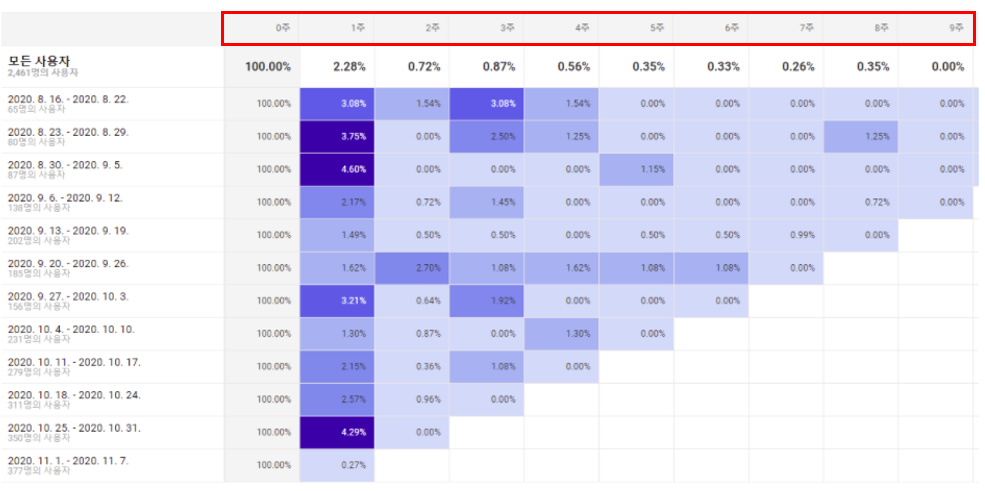

In [30]:
cohorts=cohorts.reset_index()

In [31]:
# 각 코호트그룹 데이터의 갯수
cohorts['CohortGroup'].value_counts()

2009-01    15
2009-02    13
2009-03    13
2009-04    12
2009-05    11
2009-06    10
2009-07     9
2009-08     8
2009-09     7
2009-10     6
2009-11     5
2009-12     4
2010-01     3
2010-02     2
2010-03     1
Name: CohortGroup, dtype: int64

In [32]:
cohortperiod=[]

for x in cohorts['CohortGroup'].value_counts(): 
    for y in range(x): #첫 번째 데이터(15일 경우)
        cohortperiod.append(y) #range함수의 결과값은 0부터 시작하지만 수를 세야 하므로 1을 더해줌

In [33]:
cohortperiod

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 1,
 0]

In [34]:
cohorts['CohortPeriod']=cohortperiod

In [35]:
cohorts

,CohortGroup,OrderPeriod,TotalUsers,TotalCharges,CohortPeriod
0,2009-01,2009-01,22,1850.2550,0
1,2009-01,2009-02,8,1351.0650,1
2,2009-01,2009-03,10,1357.3600,2
3,2009-01,2009-04,9,1604.5000,3
4,2009-01,2009-05,10,1575.6250,4
5,2009-01,2009-06,8,1384.8400,5
6,2009-01,2009-07,8,1750.8400,6
7,2009-01,2009-08,7,1426.5714,7
8,2009-01,2009-09,7,1964.2755,8
9,2009-01,2009-10,7,860.3292,9


# User Retention by Cohort Group
- We want to look at the percentage change of each CohortGroup over time

In [37]:
# reindex the DataFrame
cohorts.set_index(['CohortGroup','CohortPeriod'],inplace=True)

In [38]:
#총 유저수에 대한 코호트
#unstack(인덱스순서)
#입력된 인덱스가 칼럼으로 변경됨
cohorts['TotalUsers'].unstack(0)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
0,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
1,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,NaN
2,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,NaN,NaN
3,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,NaN,NaN,NaN
4,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN
5,8.0,4.0,2.0,7.0,6.0,5.0,10.0,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN
6,8.0,4.0,2.0,4.0,3.0,3.0,11.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,5.0,3.0,6.0,5.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7.0,5.0,2.0,2.0,5.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 비율 변화를 보기 위한 코딩 진행
- 각 코호트 그룹의 첫 번째 월의 토탈유저데이터를 추출

In [42]:
cohorts

OrderPeriod  TotalUsers  TotalCharges
CohortGroup CohortPeriod                                      
2009-01     0                2009-01          22     1850.2550
            1                2009-02           8     1351.0650
            2                2009-03          10     1357.3600
            3                2009-04           9     1604.5000
            4                2009-05          10     1575.6250
            5                2009-06           8     1384.8400
            6                2009-07           8     1750.8400
            7                2009-08           7     1426.5714
            8                2009-09           7     1964.2755
            9                2009-10           7      860.3292
            10               2009-11           7     1821.8153
            11               2009-12           8     2152.1165
            12               2010-01          11     2084.2236
            13               2010-02           7     2068.7771
            14               2010-03           6     1504.3325
2009-02     0                2009-02          15      666.3100
            1                2009-03           3      501.6100
            2                2009-04           5      968.7800
            3                2009-05           1       53.3600
            4                2009-06           4      758.5200
            5                2009-07           4      667.1000
            6                2009-08           4      314.1752
            7                2009-09           5      567.5057
            8                2009-10           5      328.2800
            9                2009-11           4      738.9359
            10               2009-12           3      263.1971
            11               2010-01           3      550.0098
            12               2010-02           5      734.7613
2009-03     0                2009-03          13      806.3100
            1                2009-04           4      463.8000
...                              ...         ...           ...
2009-08     6                2010-02           4     1595.9906
            7                2010-03           4      478.7787
2009-09     0                2009-09          37     1953.0553
            1                2009-10          15     2433.3013
            2                2009-11          14     1953.2262
            3                2009-12           8     1371.3499
            4                2010-01          13     2262.0346
            5                2010-02           9     1842.9434
            6                2010-03           8      688.6822
2009-10     0                2009-10          54     3802.2525
            1                2009-11          17     1957.8872
            2                2009-12          12     2394.5338
            3                2010-01          13     1952.0574
            4                2010-02          13     1783.1022
            5                2010-03           7      546.0691
2009-11     0                2009-11         130     6738.5869
            1                2009-12          32     5107.4213
            2                2010-01          26     5046.8124
            3                2010-02          29     3486.0959
            4                2010-03          13      961.3681
2009-12     0                2009-12          65     4571.6911
            1                2010-01          17     2565.4410
            2                2010-02          18     1785.7853
            3                2010-03           7      534.0929
2010-01     0                2010-01          95     9677.9032
            1                2010-02          50     8453.1039
            2                2010-03          26     2238.6461
2010-02     0                2010-02         100     7374.7108
            1                2010-03          19      945.9633
2010-03     0                2010-03          24     1099.5471

[119 rows x 3 columns]

In [44]:
first_data=cohorts['TotalUsers'].reset_index()

In [45]:
first_data

,CohortGroup,CohortPeriod,TotalUsers
0,2009-01,0,22
1,2009-01,1,8
2,2009-01,2,10
3,2009-01,3,9
4,2009-01,4,10
5,2009-01,5,8
6,2009-01,6,8
7,2009-01,7,7
8,2009-01,8,7
9,2009-01,9,7


In [46]:
# create a Series holding the total size of each CohortGroup
# 집계함수 first
first_data=first_data.groupby('CohortGroup').first()['TotalUsers']

In [47]:
first_data

CohortGroup
2009-01     22
2009-02     15
2009-03     13
2009-04     39
2009-05     50
2009-06     32
2009-07     50
2009-08     31
2009-09     37
2009-10     54
2009-11    130
2009-12     65
2010-01     95
2010-02    100
2010-03     24
Name: TotalUsers, dtype: int64

In [54]:
# 총 유저수에 대한 코호트를 first_data로 열방향(axis=1)으로 나눈다. 
user_retention=cohorts['TotalUsers'].unstack(0).divide(first_data,axis=1)

In [55]:
user_retention

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
1,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
2,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
3,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
4,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
5,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
7,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#데이터프레임 index의 이름을 CohortPeriod에서 period로 수정한다
user_retention.index.name='Period'

In [65]:
user_retention

,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01
Period,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
1,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
2,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
3,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
4,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
5,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
7,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 기간이 행에, 코호트 기간이 열로 표현되어 있는 GA의 코호트
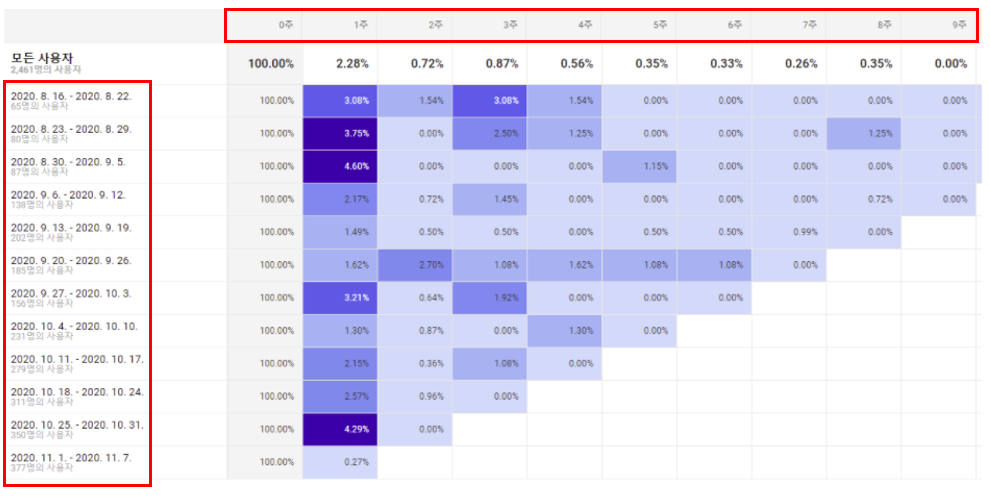

In [64]:
#데이터프레임.T
#행과 열 위치 변경
user_retention.T

Period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2019-08-01,1.0,0.363636,0.454545,0.409091,0.454545,0.363636,0.363636,0.318182,0.318182,0.318182,0.318182,0.363636,0.500000,0.318182,0.272727
2019-09-01,1.0,0.200000,0.333333,0.066667,0.266667,0.266667,0.266667,0.333333,0.333333,0.266667,0.200000,0.200000,0.333333,NaN,NaN
2019-10-01,1.0,0.307692,0.384615,0.307692,0.076923,0.153846,0.153846,0.230769,0.153846,0.076923,0.230769,0.153846,0.076923,NaN,NaN
2019-11-01,1.0,0.333333,0.256410,0.333333,0.153846,0.179487,0.102564,0.153846,0.051282,0.102564,0.076923,0.051282,NaN,NaN,NaN
2019-12-01,1.0,0.260000,0.240000,0.100000,0.080000,0.120000,0.060000,0.100000,0.100000,0.080000,0.060000,NaN,NaN,NaN,NaN
2020-01-01,1.0,0.468750,0.281250,0.187500,0.218750,0.156250,0.093750,0.093750,0.312500,0.093750,NaN,NaN,NaN,NaN,NaN
2020-02-01,1.0,0.460000,0.260000,0.200000,0.220000,0.200000,0.220000,0.140000,0.140000,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,1.0,0.354839,0.290323,0.225806,0.193548,0.258065,0.129032,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,1.0,0.405405,0.378378,0.216216,0.351351,0.243243,0.216216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-01,1.0,0.314815,0.222222,0.240741,0.240741,0.129630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 시각화 라이브러리 seaborn을 사용하여 코호트 시각화

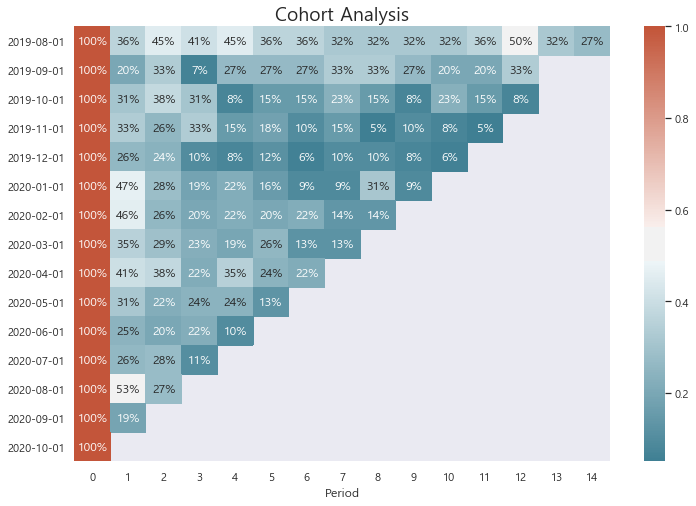

In [63]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', cmap=cmap);